# Q1 : OneHotEncoding Example

In [4]:
import pandas as pd

ids = [24, 33, 37, 44, 58, 62, 71]
countries = ['Bangladesh', 'India', 'Ukraine', 'Poland', 'Japan']

#creating pandas dataframe
df = pd.DataFrame(list(zip(ids, countries)),
                  columns=['Ids', 'Countries'])

In [6]:
#printing top 5
df.head()

,Ids,Countries
0,24,Bangladesh
1,33,India
2,37,Ukraine
3,44,Poland
4,58,Japan


In [7]:
#importing OneHotEncoder from sklearn library
from sklearn.preprocessing import OneHotEncoder

In [8]:
#Populating as list and fitting it in the encoder
x = [[24, "Bangladesh"], [33, "India"], [37, "Ukraine"], [44, "Poland"], [58, "Japan"]]
y = OneHotEncoder().fit_transform(x).toarray()
print(y)

[[1. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 1. 0. 0.]]


#  Q1 : Standardization Example

In [10]:
from sklearn.preprocessing import StandardScaler
data = [[0, 0], [0, 0], [1, 1], [1, 1] , [2,2]]
sc = StandardScaler()

StandardScaler()
[0.8 0.8]
[[-1.06904497 -1.06904497]
 [-1.06904497 -1.06904497]
 [ 0.26726124  0.26726124]
 [ 0.26726124  0.26726124]
 [ 1.60356745  1.60356745]]
[[2.93987366 2.93987366]]


In [11]:
#Fit function calculates avg,standard devation.
print(sc.fit(data))

StandardScaler()


In [12]:
#After calling fit function it generates mean value
print(sc.mean_)

[0.8 0.8]


In [13]:
#Transforming original data
print(sc.transform(data))

[[-1.06904497 -1.06904497]
 [-1.06904497 -1.06904497]
 [ 0.26726124  0.26726124]
 [ 0.26726124  0.26726124]
 [ 1.60356745  1.60356745]]


In [14]:
print(sc.transform([[3, 3]]))

[[2.93987366 2.93987366]]


# Q2. PCA Example

In [32]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [33]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [34]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [37]:
df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [41]:
from sklearn.preprocessing import StandardScaler
sclr = StandardScaler()
sclr.fit(df)

StandardScaler()

In [42]:
scdt = sclr.transform(df)

In [43]:
xpca = pca.fit_transform(scdt)

In [44]:
scdt.shape

(569, 30)

In [45]:
xpca.shape

(569, 2)

Text(0, 0.5, 'Second_Principal_Component')

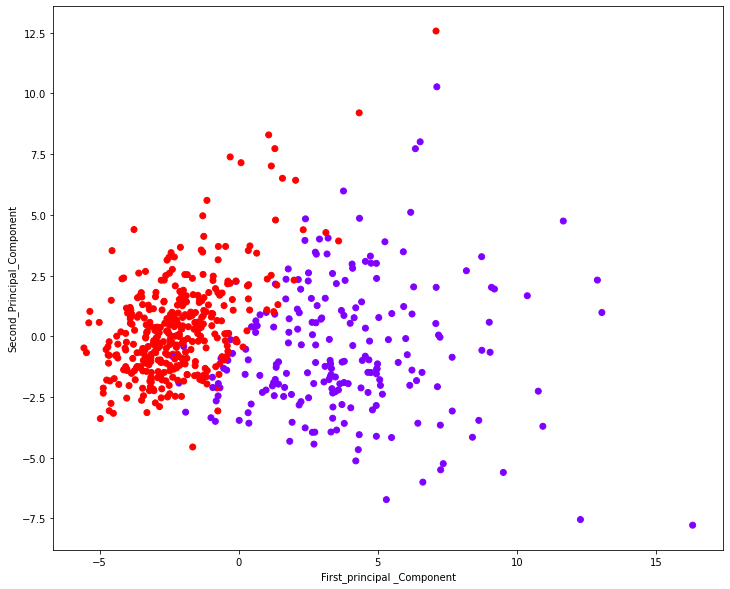

In [50]:
plt.figure(figsize=(12,10))
plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer['target'],cmap='rainbow')
plt.xlabel('First_principal _Component')
plt.ylabel('Second_Principal_Component')

# Q3. SVC Kernel Trick

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# taking csv file in dataframe
bankdata = pd.read_csv("bill_authentication.csv")

In [4]:
bankdata.shape

(1372, 5)

In [5]:
bankdata.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [16]:
X = bankdata.drop('Class', axis=1)
y = bankdata['Class']

In [17]:
#Splitting data ets for training and tsting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [18]:
y_pred = svclassifier.predict(X_test)

In [19]:
#Polynomial Kernel
from sklearn.svm import SVC
svclassifier = SVC(kernel='poly', degree=4)
svclassifier.fit(X_train, y_train)

SVC(degree=4, kernel='poly')

In [20]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[222  12]
 [  0 178]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       234
           1       0.94      1.00      0.97       178

    accuracy                           0.97       412
   macro avg       0.97      0.97      0.97       412
weighted avg       0.97      0.97      0.97       412



In [21]:
#Gaussian Kernel
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)

SVC()

In [22]:
y_pred = svclassifier.predict(X_test)

In [23]:
#Printing Classification Report rbf gives us a good resul than polynomial kernel
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[233   1]
 [  0 178]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       234
           1       0.99      1.00      1.00       178

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



In [24]:
#Appying sigmoid kernel trick, it gives us a porr result
from sklearn.svm import SVC
svclassifier = SVC(kernel='sigmoid')
svclassifier.fit(X_train, y_train)

SVC(kernel='sigmoid')

In [25]:
y_pred = svclassifier.predict(X_test)

In [26]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[161  73]
 [ 58 120]]
              precision    recall  f1-score   support

           0       0.74      0.69      0.71       234
           1       0.62      0.67      0.65       178

    accuracy                           0.68       412
   macro avg       0.68      0.68      0.68       412
weighted avg       0.69      0.68      0.68       412



# Q.5 Decsion tree max_depth

In [32]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [33]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("diabetes.csv", header=None, names=col_names)

In [40]:
pima.head()


,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [41]:
pima.shape

(769, 9)

In [42]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

In [45]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 80% training and 20% test

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5)

# Train Decision Tree Classifer
clf = clf.fit(X_training,y_training)

#Predict the response for test dataset
y_prediction = clf.predict(X_testing)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_prediction))

In [ ]:
Accuracy: 0.7705627705627706

In [ ]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png()

# Q6. Random Forest Classifier

In [19]:
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
iris = datasets.load_iris()

In [20]:
# print the label species(setosa, versicolor,virginica)
print(iris.target_names)

# print the names of the four features
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [21]:
# print the iris data (top 5 records)
print(iris.data[0:5])

# print the iris labels (0:setosa, 1:versicolor, 2:virginica)
print(iris.target)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [22]:
# Creating a DataFrame of given iris dataset.
import pandas as pd
data=pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})
data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [23]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X=data[['sepal length', 'sepal width', 'petal length', 'petal width']]  # Features
y=data['species']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8) # 80% training and 20% test

In [24]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [25]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.95


# Q6. Random Forest Regression

In [9]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
#Taking data in a dataframe
dataset = pd.read_csv('https://raw.githubusercontent.com/mk-gurucharan/Regression/master/IceCreamData.csv')
X = dataset['Temperature'].values
y = dataset['Revenue'].values

In [11]:
#printing top 5
dataset.head(5)

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [12]:
#Splitting dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [13]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

<ipython-input-13-cade36db796f>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))


RandomForestRegressor(n_estimators=10, random_state=0)

In [14]:
y_pred = regressor.predict(X_test.reshape(-1,1))

In [16]:
df = pd.DataFrame({'Real Values':y_test.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})
df

,Real Values,Predicted Values
0,689.930778,732.137657
1,574.710649,577.598355
2,696.716640,698.089440
3,809.352519,766.664690
4,158.849806,178.791978
...,...,...
95,632.901914,635.418001
96,477.295054,453.344632
97,828.296077,806.383108
98,289.540934,305.034357


<ipython-input-18-02123257709f>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))


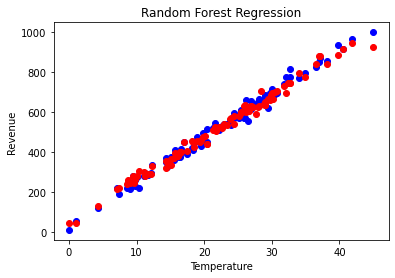

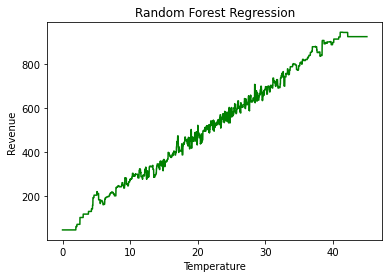

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('https://raw.githubusercontent.com/mk-gurucharan/Regression/master/IceCreamData.csv')
X = dataset['Temperature'].values
y = dataset['Revenue'].values

dataset.head(5)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

y_pred = regressor.predict(X_test.reshape(-1,1))
y_pred

df = pd.DataFrame({'Real Values':y_test.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})
df

# # Visualising the Random Forest Regression Results  
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_test, y_test, color = 'blue')
plt.scatter(X_test, y_pred, color = 'red')
plt.title('Random Forest Regression')
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.show()

plt.plot(X_grid, regressor.predict(X_grid), color = 'green')
plt.title('Random Forest Regression')
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.show()